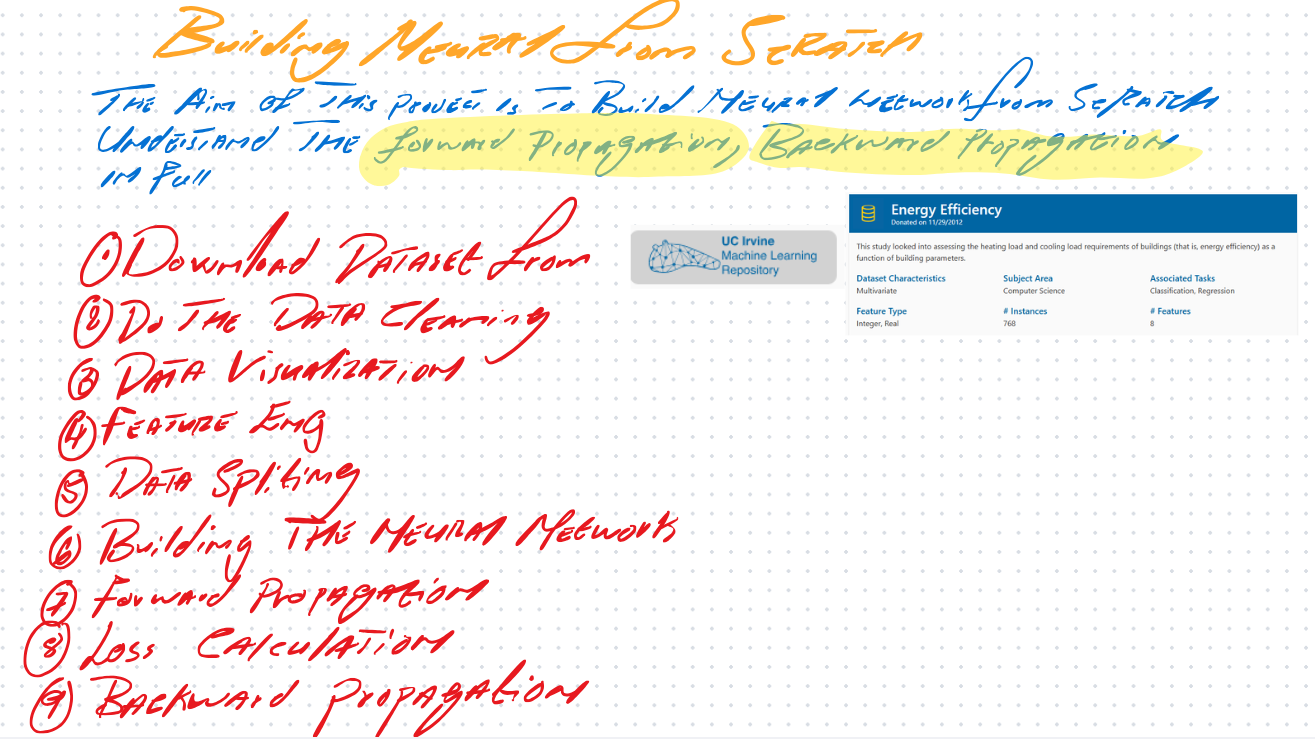

In [169]:
import pandas as pd 
import numpy as np

In [170]:
df = pd.read_excel("energy+efficiency\\ENB2012_data.xlsx")
df = df.drop(df.columns[0], axis=1)

In [171]:
df.head()

,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


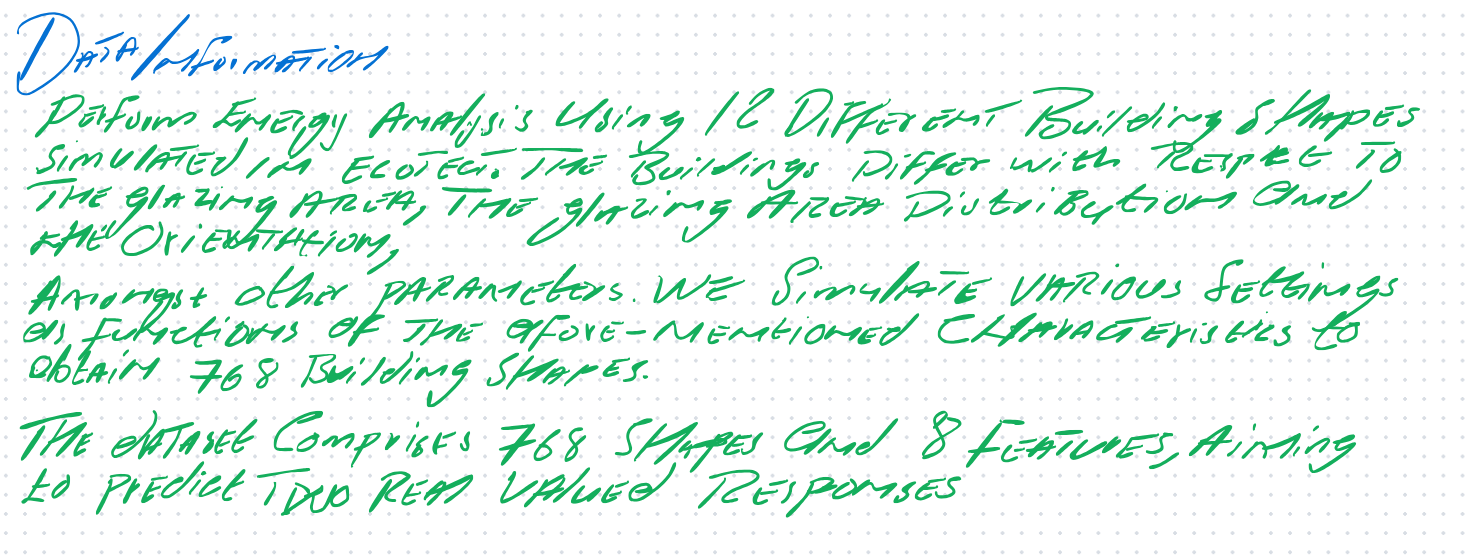

In [172]:
df = (df - df.mean(axis=0)) / df.std(axis=0)

In [173]:
df.head()

,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669679,-0.342443
1,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669679,-0.342443
2,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669679,-0.342443
3,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669679,-0.342443
4,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145408,0.388113


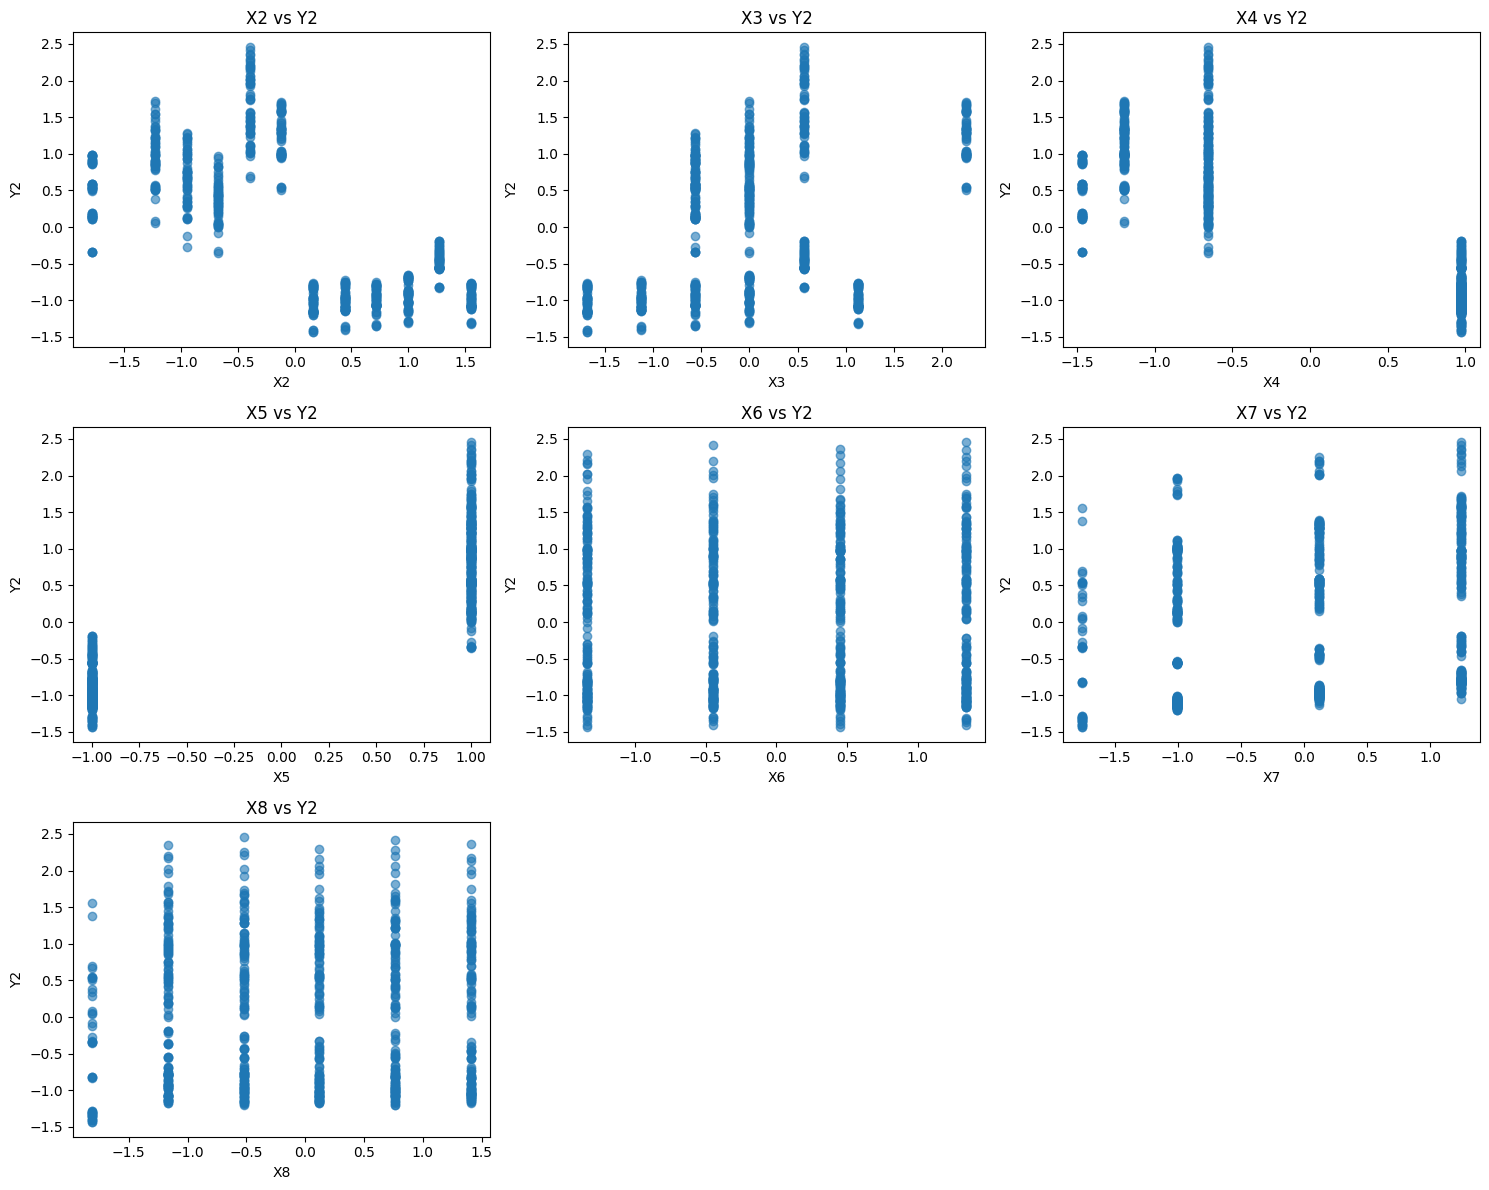

In [174]:
import matplotlib.pyplot as plt

# List all feature columns (exclude Y2)
feature_cols = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target_col = 'Y2'

# Create subplots (3 rows × 3 columns is fine for 7 features)
plt.figure(figsize=(15, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[col], df[target_col], alpha=0.6)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)

plt.tight_layout()
plt.show()


In [175]:
X = df.iloc[:,:-1]
y = df[['Y1']]

In [176]:
X.head()

,X2,X3,X4,X5,X6,X7,X8,Y1
0,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669679
1,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669679
2,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669679
3,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669679
4,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145408


In [177]:
X.shape

(768, 8)

In [178]:
X

,X2,X3,X4,X5,X6,X7,X8,Y1
0,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,-0.669679
1,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,-0.669679
2,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,-0.669679
3,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,-0.669679
4,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,-0.145408
...,...,...,...,...,...,...,...,...
763,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,-0.438762
764,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,-0.571564
765,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,-0.581474
766,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,-0.577510


In [179]:
X_train = X.iloc[:600].to_numpy().T
X_test = X.iloc[600:700].to_numpy().T
y_trian = y.iloc[:600].to_numpy().reshape(1, -1)
y_test = y.iloc[600:700].to_numpy().reshape(1, -1)

validation = df.iloc[700:].to_numpy() 

In [180]:
X_train.shape

(8, 600)

In [181]:
X_train

array([[-1.78471183, -1.78471183, -1.78471183, ..., -0.11589038,
        -0.11589038, -0.11589038],
       [-0.56158551, -0.56158551, -0.56158551, ...,  2.24634206,
         2.24634206,  2.24634206],
       [-1.46911924, -1.46911924, -1.46911924, ..., -1.19789723,
        -1.19789723, -1.19789723],
       ...,
       [-1.75930048, -1.75930048, -1.75930048, ...,  1.243239  ,
         1.243239  ,  1.243239  ],
       [-1.81339339, -1.81339339, -1.81339339, ..., -0.5238692 ,
        -0.5238692 , -0.5238692 ],
       [-0.66967876, -0.66967876, -0.66967876, ...,  1.76832944,
         1.80995397,  1.79508806]], shape=(8, 600))

In [182]:
print(X_train.shape, 
X_test.shape,
y_trian.shape,
y_test.shape,
validation.shape )

(8, 600) (8, 100) (1, 600) (1, 100) (68, 9)


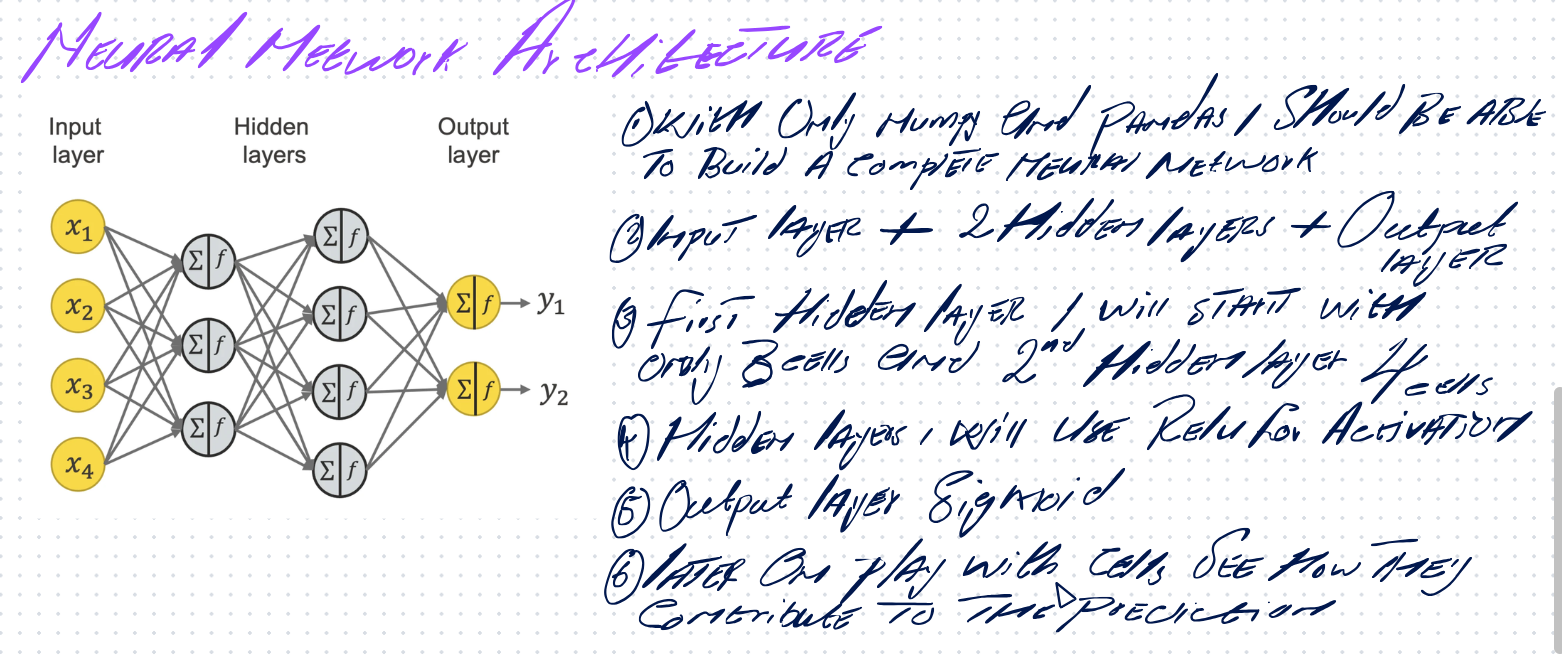

In [183]:
def init_params():
    
    W1 = np.random.randn(3,8) * np.sqrt(2/8)
    B1 = np.zeros((3,1))
    W2 = np.random.randn(4,3) * np.sqrt(2/3)
    B2 = np.zeros((4, 1))
    W3 = np.random.randn(1,4) * np.sqrt(2/4)
    B3 = np.zeros((1, 1))

    return W1, B1, W2, B2, W3, B3
    

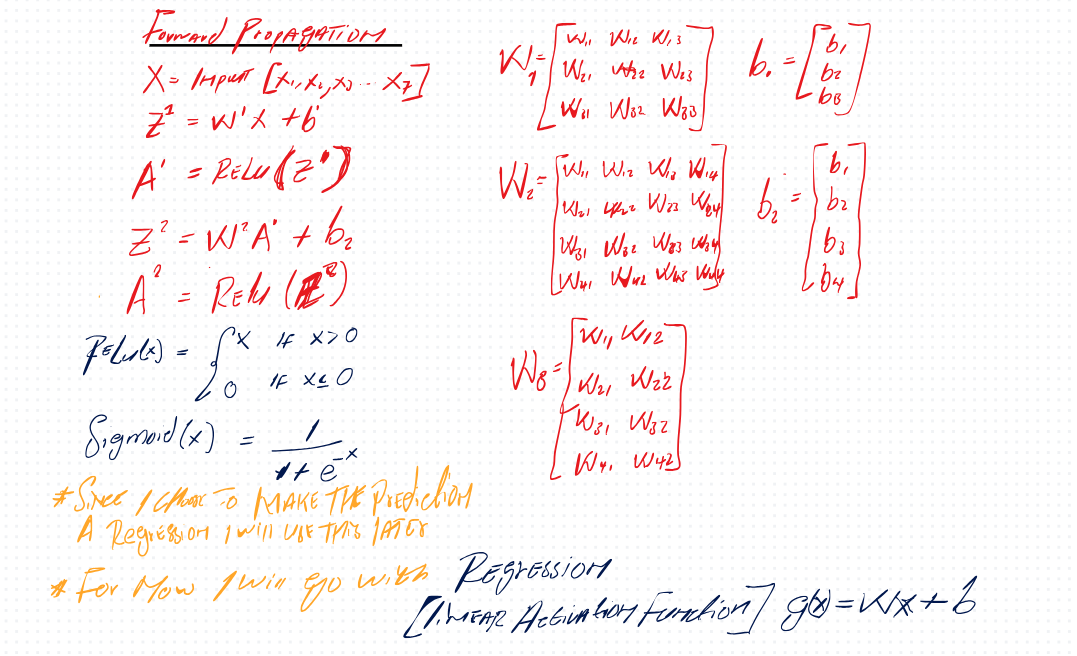

In [184]:
def ReLU(z):
    return np.maximum(0, z)

In [185]:
def linear(z):
    return z

In [186]:
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha*z)

def deriv_leaky_relu(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

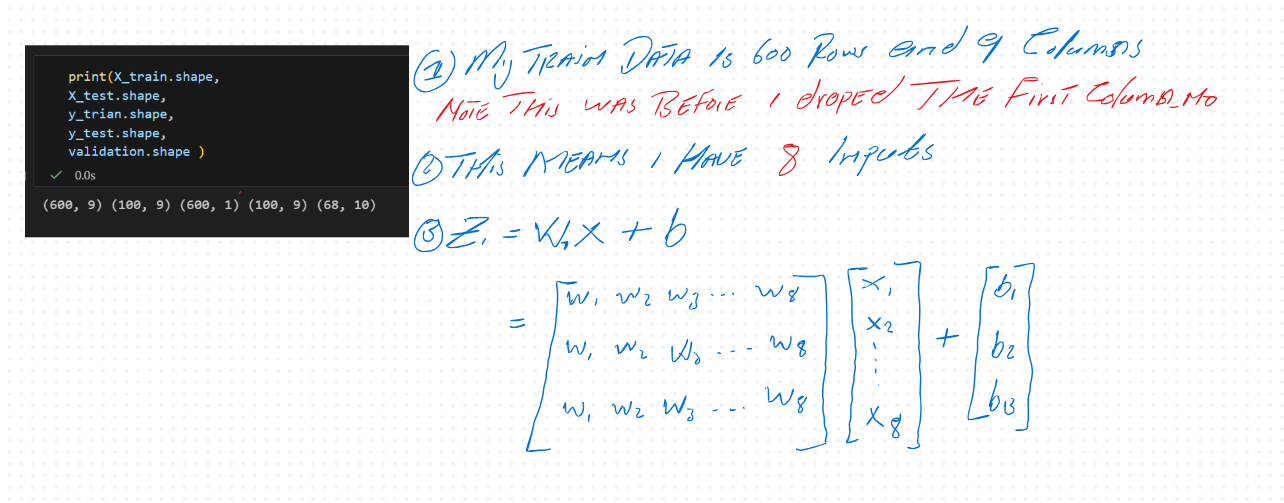

In [187]:
def forward_Propagation(X_train, W1, B1, W2, B2, W3, B3):
    Z1 = W1.dot(X_train) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + B3
    A3 = linear(Z3)

    return Z1, A1, Z2, A2, Z3, A3

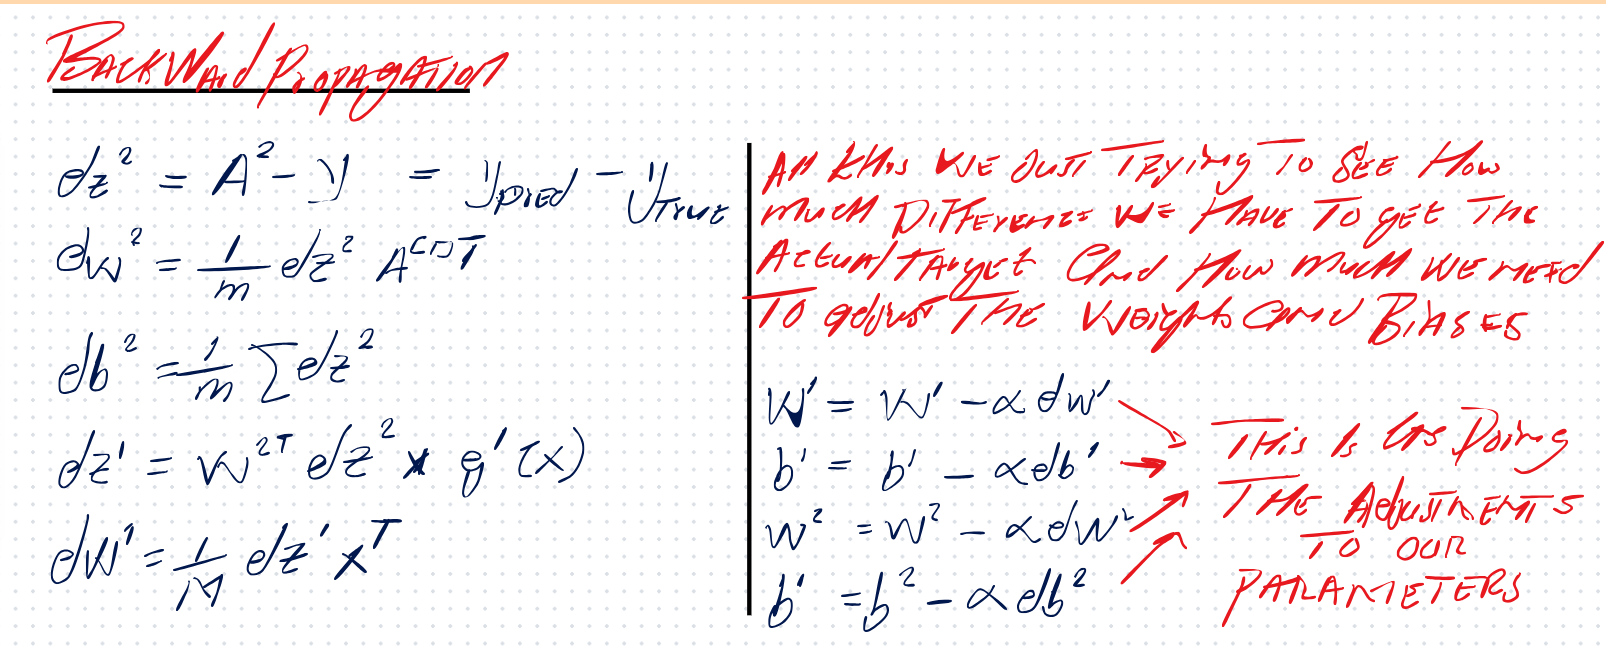

In [188]:
def deriv_ReLU(z):
    return (z > 0).astype(int)

In [189]:
def back_propagation(Z1, A1, Z2, A2, Z3, A3,W1, W2, W3, X, Y):
    m = Y.shape[1] 
    dz3 = A3 - Y
    dw3 = (1/m) * dz3.dot(A2.T)
    db3 = (1/m) * np.sum(dz3, axis=1, keepdims=True)
    dz2 = W3.T.dot(dz3) * deriv_ReLU(Z2)   
    dw2 = (1/m) * dz2.dot(A1.T)            
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)  
    dz1 = W2.T.dot(dz2) * deriv_ReLU(Z1)  
    dw1 = (1/m) * dz1.dot(X.T)             
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2, dw3, db3

In [190]:
def update_params(W1, B1, W2, B2, W3, B3, dw1, db1, dw2, db2, dw3, db3, alpha):
    W1 -= alpha * dw1
    B1 -= alpha * db1
    W2 -= alpha * dw2
    B2 -= alpha * db2
    W3 -= alpha * dw3
    B3 -= alpha * db3

    return W1, B1, W2, B2, W3, B3

In [191]:
def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y)/ y.size

In [192]:
def gradient_decent(X, Y, iterations, alpha):
    W1, B1, W2, B2, W3, B3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_Propagation(X,W1, B1, W2, B2, W3, B3)
        dw1, db1, dw2, db2, dw3, db3 = back_propagation(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        w1, b1, w2, b2, w3, b3 = update_params(W1, B1, W2, B2,W3, B3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            loss = np.mean((A3 - Y)**2)
            print("Loss:", loss)
    return w1, b1, w2, b2, w3,b3

In [193]:
w1, b1, w2, b2, w3,b3  = gradient_decent(X_train, y_trian, 500, 0.05)

Iteration:  0
Loss: 1.8744737405787575
Iteration:  10
Loss: 1.0031516222872037
Iteration:  20
Loss: 0.8633561301750557
Iteration:  30
Loss: 0.7622321320539024
Iteration:  40
Loss: 0.6468205848869322
Iteration:  50
Loss: 0.5390002795020157
Iteration:  60
Loss: 0.45746564793049915
Iteration:  70
Loss: 0.38701283943547726
Iteration:  80
Loss: 0.327928725092597
Iteration:  90
Loss: 0.28091548260606536
Iteration:  100
Loss: 0.2426419662175416
Iteration:  110
Loss: 0.21197536697803257
Iteration:  120
Loss: 0.18831419236798227
Iteration:  130
Loss: 0.17034373336476696
Iteration:  140
Loss: 0.1567406855333223
Iteration:  150
Loss: 0.14671221090343484
Iteration:  160
Loss: 0.13933109705332805
Iteration:  170
Loss: 0.13363456559531672
Iteration:  180
Loss: 0.12913278648597204
Iteration:  190
Loss: 0.12538370307465083
Iteration:  200
Loss: 0.12112601605942766
Iteration:  210
Loss: 0.11511260495868167
Iteration:  220
Loss: 0.1107901446607589
Iteration:  230
Loss: 0.10758925635890904
Iteration:  24

In [194]:
def model_evaluation(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (mse / np.var(y_true))


    print("MSE:", mse)
    print("MAE:", mae)
    print("R² score:", r2)

In [202]:
Z1, A1, Z2, A2, Z3, A3 = forward_Propagation(X_test,w1, b1, w2, b2, w3,b3)

In [203]:
Y_pred = A3
model_evaluation(y_test, Y_pred)

MSE: 0.033151564898286905
MAE: 0.15821153115613476
R² score: 0.968646195244268


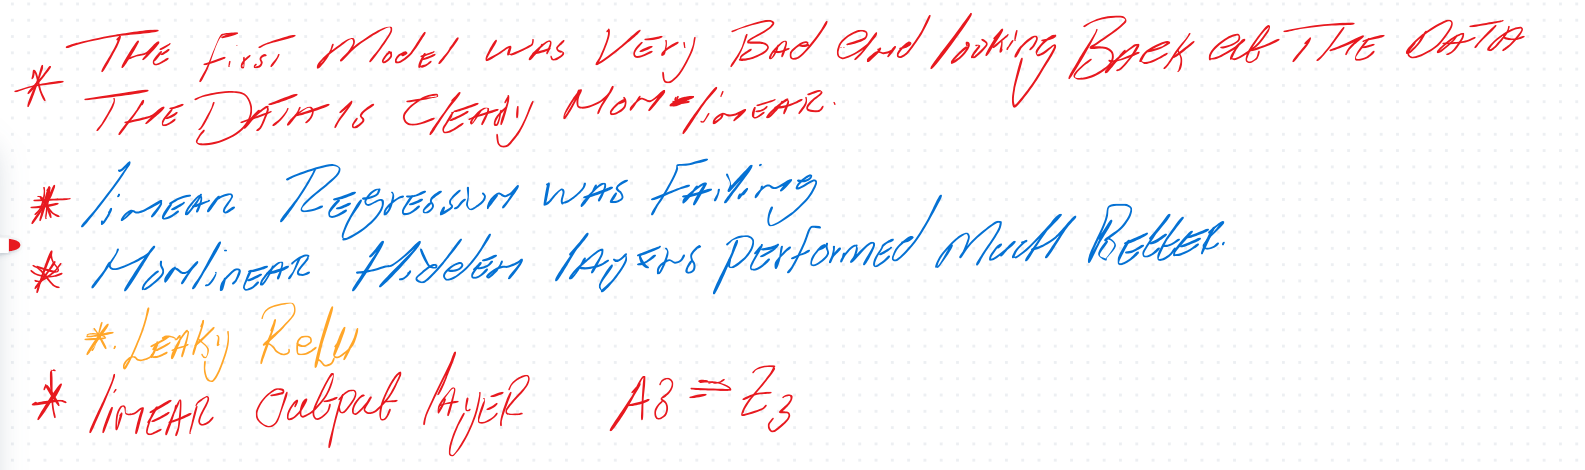

In [197]:
def forward_Propagation(X_train, W1, B1, W2, B2, W3, B3):
    Z1 = W1.dot(X_train) + B1
    A1 = leaky_relu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = leaky_relu(Z2)
    Z3 = W3.dot(A2) + B3
    A3 = linear(Z3)

    return Z1, A1, Z2, A2, Z3, A3

In [198]:
def back_propagation(Z1, A1, Z2, A2, Z3, A3,W1, W2, W3, X, Y):
    m = Y.shape[1] 
    dz3 = A3 - Y
    dw3 = (1/m) * dz3.dot(A2.T)
    db3 = (1/m) * np.sum(dz3, axis=1, keepdims=True)
    dz2 = W3.T.dot(dz3) * deriv_leaky_relu(Z2)   
    dw2 = (1/m) * dz2.dot(A1.T)            
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)  
    dz1 = W2.T.dot(dz2) * deriv_leaky_relu(Z1)  
    dw1 = (1/m) * dz1.dot(X.T)             
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2, dw3, db3

In [199]:
w1, b1, w2, b2, w3,b3  = gradient_decent(X_train, y_trian, 500, 0.05)

Iteration:  0
Loss: 4.738615340165078
Iteration:  10
Loss: 0.9570283560070951
Iteration:  20
Loss: 0.8198563508970131
Iteration:  30
Loss: 0.7301423316146081
Iteration:  40
Loss: 0.6269888650258504
Iteration:  50
Loss: 0.5067505744175899
Iteration:  60
Loss: 0.40171971972009357
Iteration:  70
Loss: 0.3219505613049576
Iteration:  80
Loss: 0.2699526604259242
Iteration:  90
Loss: 0.23101069025170282
Iteration:  100
Loss: 0.20020867691973257
Iteration:  110
Loss: 0.17551526506962542
Iteration:  120
Loss: 0.1551037585263879
Iteration:  130
Loss: 0.13794003357085832
Iteration:  140
Loss: 0.1226799555813533
Iteration:  150
Loss: 0.10899325518747896
Iteration:  160
Loss: 0.09815324932759187
Iteration:  170
Loss: 0.08934482008037432
Iteration:  180
Loss: 0.08139628103436623
Iteration:  190
Loss: 0.07449727613176758
Iteration:  200
Loss: 0.0689407273311656
Iteration:  210
Loss: 0.06416930405393385
Iteration:  220
Loss: 0.05927876307216929
Iteration:  230
Loss: 0.05511052157241361
Iteration:  240

In [204]:
Z1, A1, Z2, A2, Z3, A3 = forward_Propagation(X_test,w1, b1, w2, b2, w3,b3)

In [205]:
Y_pred = A3
model_evaluation(y_test, Y_pred)

MSE: 0.033151564898286905
MAE: 0.15821153115613476
R² score: 0.968646195244268


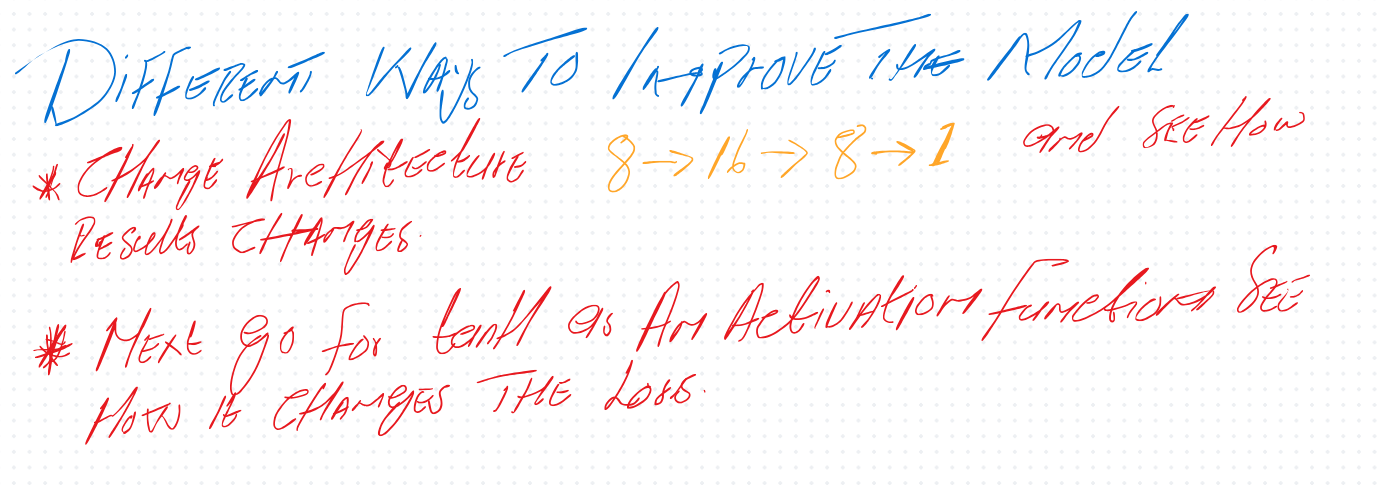